In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [2]:
input_dir = os.path.join('..', 'data', 'raw')
output_dir = os.path.join('..', 'data', 'processed')

In [3]:
df = pd.read_csv(os.path.join(input_dir, 'Salary_Data.csv'))

In [4]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [6]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [7]:
# Data Cleaning
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [8]:
# Check for duplicate rows
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
4912


In [9]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)
print("\nNumber of duplicate rows after removal:")
print(df.duplicated().sum())


Number of duplicate rows after removal:
0


In [10]:
# Inspect unique values in categorical columns
print("\nUnique values in 'Gender':")
print(df['Gender'].unique())
print("\nUnique values in 'Education Level':")
print(df['Education Level'].unique())


Unique values in 'Gender':
['Male' 'Female' nan 'Other']

Unique values in 'Education Level':
["Bachelor's" "Master's" 'PhD' nan "Bachelor's Degree" "Master's Degree"
 'High School' 'phD']


In [11]:
# Standardize 'Education Level' values
df['Education Level'] = df['Education Level'].replace({
    "Bachelor's": "Bachelor's Degree",
    "Master's": "Master's Degree",
    "phD": "PhD"})

In [12]:
print("\nUnique values in 'Education Level' after standardization:")
print(df['Education Level'].unique())


Unique values in 'Education Level' after standardization:
["Bachelor's Degree" "Master's Degree" 'PhD' nan 'High School']


In [13]:
# Clean column names by removing leading/trailing spaces
df.columns = df.columns.str.strip()

In [14]:
print("\nCleaned Dataset Info:")
df.info()
print("\nFirst 5 rows of the cleaned dataset:")
df.head()


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1792 entries, 0 to 6631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1791 non-null   float64
 1   Gender               1791 non-null   object 
 2   Education Level      1790 non-null   object 
 3   Job Title            1791 non-null   object 
 4   Years of Experience  1790 non-null   float64
 5   Salary               1788 non-null   float64
dtypes: float64(3), object(3)
memory usage: 98.0+ KB

First 5 rows of the cleaned dataset:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0
4,52.0,Male,Master's Degree,Director,20.0,200000.0


In [15]:
# Handling missing values by dropping rows with null values
df.dropna(inplace=True)
print("\nShape of the dataset after dropping missing values:")
print(df.shape)


Shape of the dataset after dropping missing values:
(1787, 6)


In [16]:
df.to_csv(os.path.join(output_dir, "processed_salary_data.csv"), index=False)

In [17]:
# Create a directory to save the plots
import os
if not os.path.exists('../reports/figures'):
    os.makedirs('../reports/figures')
plot_dir = '../reports/figures'

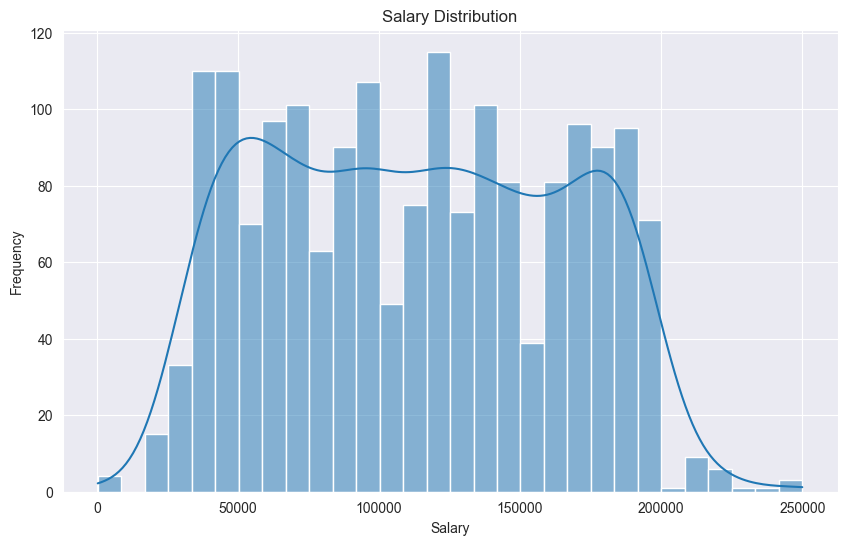

In [18]:
# 1. Salary Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.savefig(os.path.join(plot_dir , 'salary_distribution.png'))
plt.show()

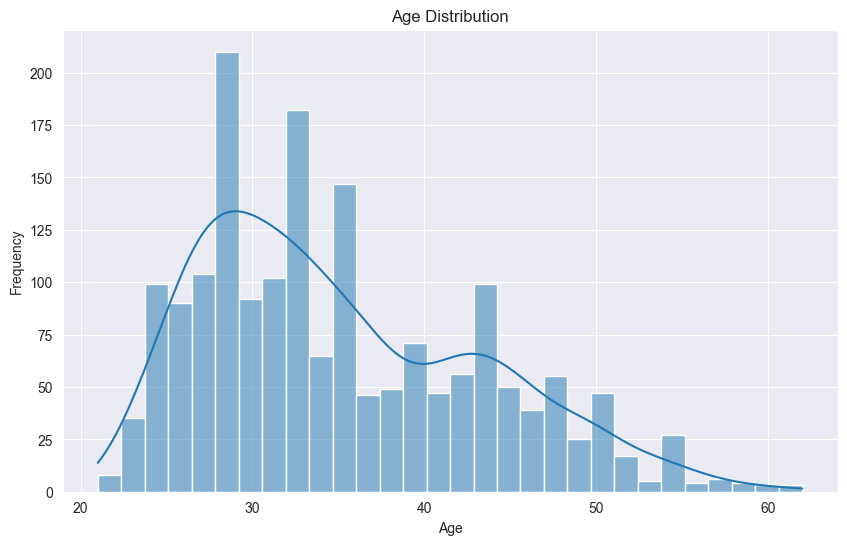

In [19]:
# 2. Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig(os.path.join(plot_dir, 'age_distribution.png'))
plt.show()

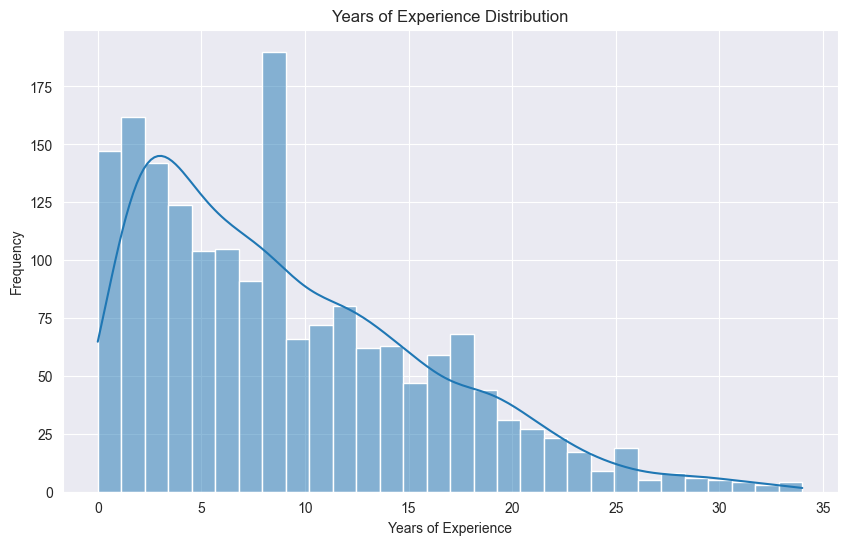

In [20]:
# 3. Years of Experience Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Years of Experience'], bins=30, kde=True)
plt.title('Years of Experience Distribution')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.savefig(os.path.join(plot_dir, 'experience_distribution.png'))

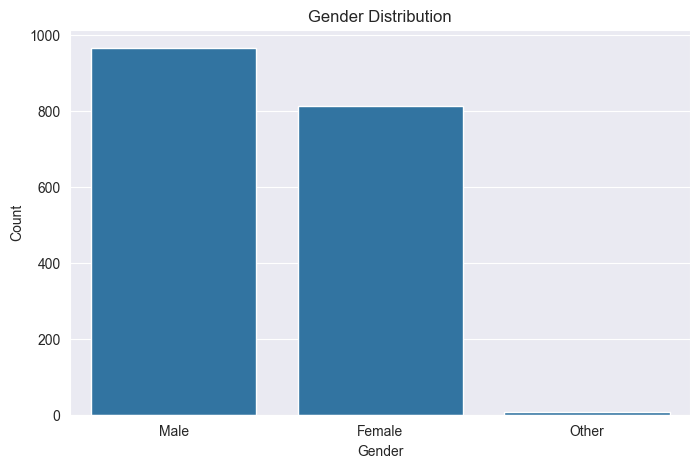

In [21]:
# 4. Gender Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df, order=df['Gender'].value_counts().index)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.savefig(os.path.join(plot_dir, 'gender_distribution.png'))
plt.show()

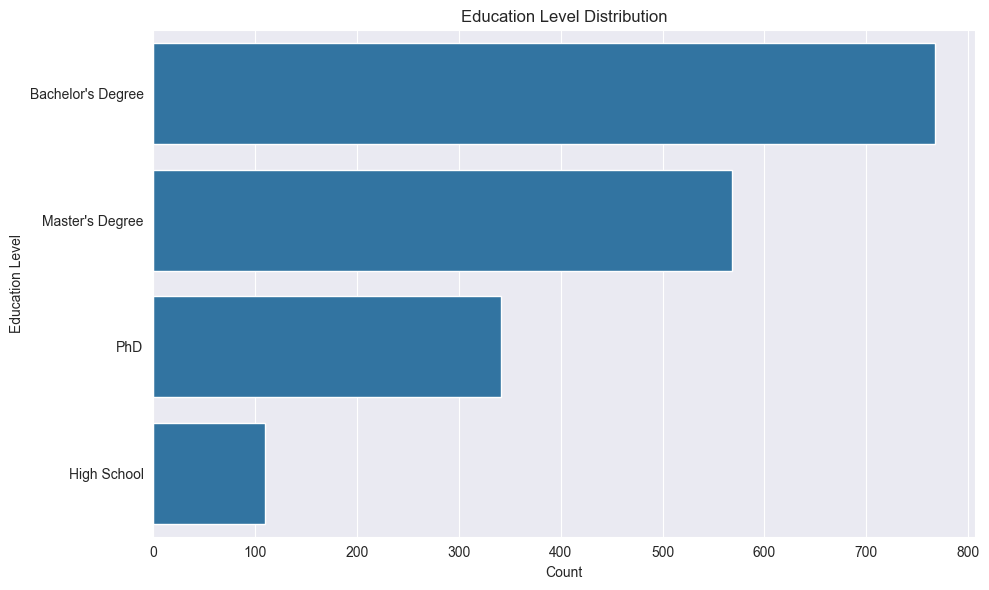

In [22]:
# 5. Education Level Distribution
plt.figure(figsize=(10, 6))
education_order = df['Education Level'].value_counts().index
sns.countplot(y='Education Level', data=df, order=education_order)
plt.title('Education Level Distribution')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'education_level_distribution.png'))

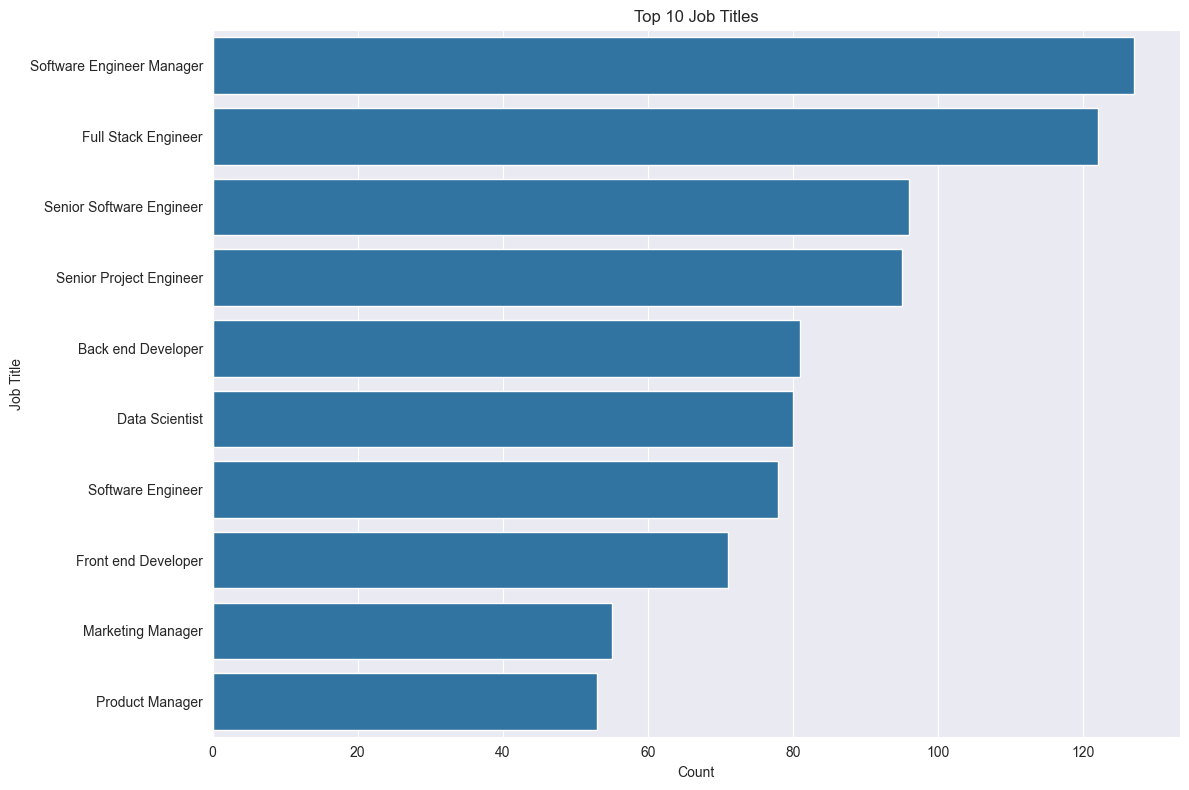

In [23]:
# 6. Job Title Distribution (Top 10)
plt.figure(figsize=(12, 8))
top_10_job_titles = df['Job Title'].value_counts().nlargest(10).index
sns.countplot(y='Job Title', data=df, order=top_10_job_titles)
plt.title('Top 10 Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.tight_layout()
plt.savefig(os.path.join(plot_dir,'top_10_job_titles.png'))
plt.show()

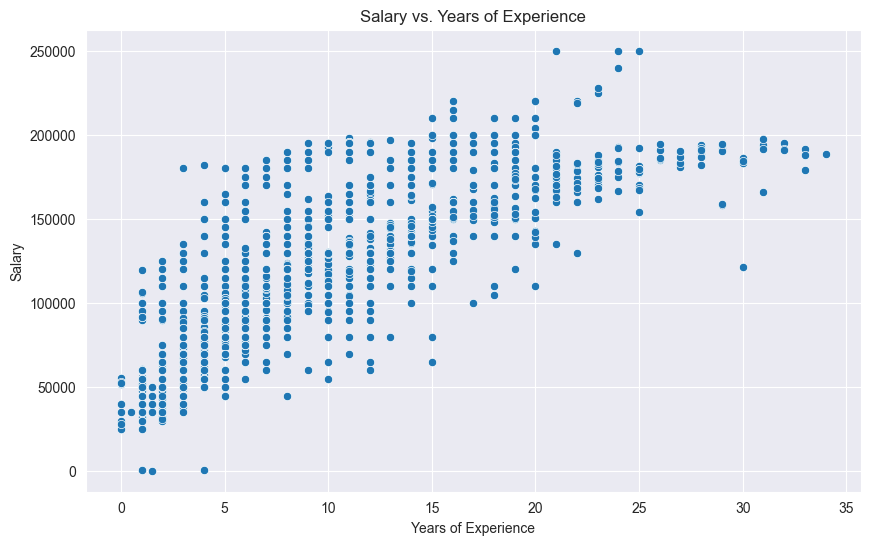

In [24]:
# 7. Salary vs. Years of Experience
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years of Experience', y='Salary', data=df)
plt.title('Salary vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.savefig(os.path.join(plot_dir,'salary_vs_experience.png'))
plt.show()

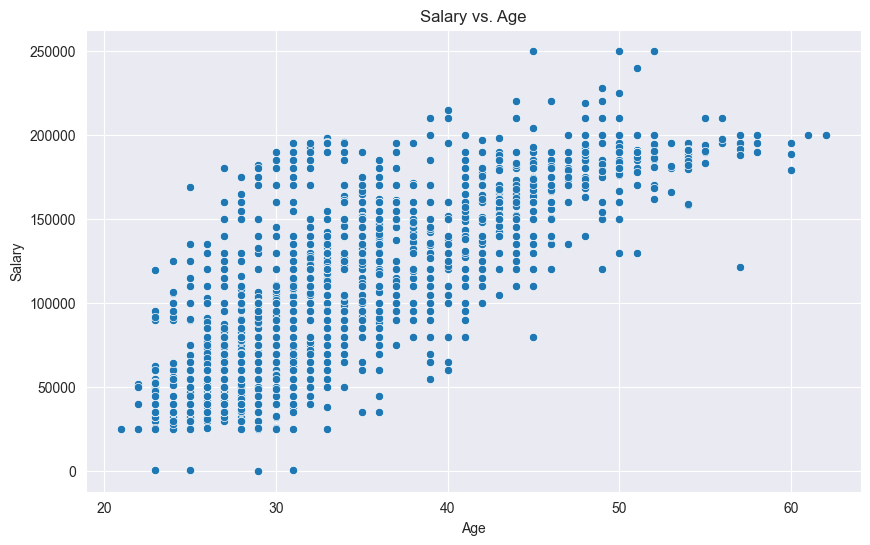

In [25]:
# 8. Salary vs. Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=df)

plt.title('Salary vs. Age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.savefig(os.path.join(plot_dir,'salary_vs_age.png'))
plt.show()

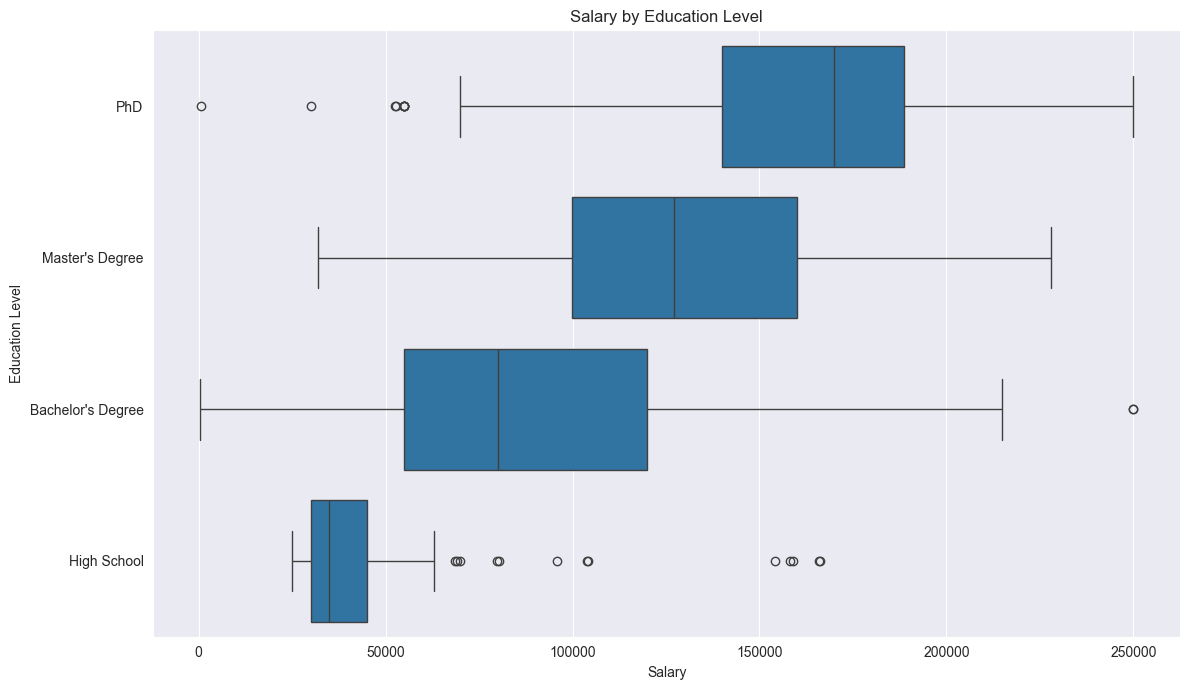

In [26]:
# 9. Salary by Education Level
plt.figure(figsize=(12, 7))
sns.boxplot(x='Salary', y='Education Level', data=df, order=df.groupby('Education Level')['Salary'].median().sort_values(ascending=False).index)
plt.title('Salary by Education Level')
plt.xlabel('Salary')
plt.ylabel('Education Level')
plt.tight_layout()
plt.savefig(os.path.join(plot_dir,'salary_by_education.png'))
plt.show()

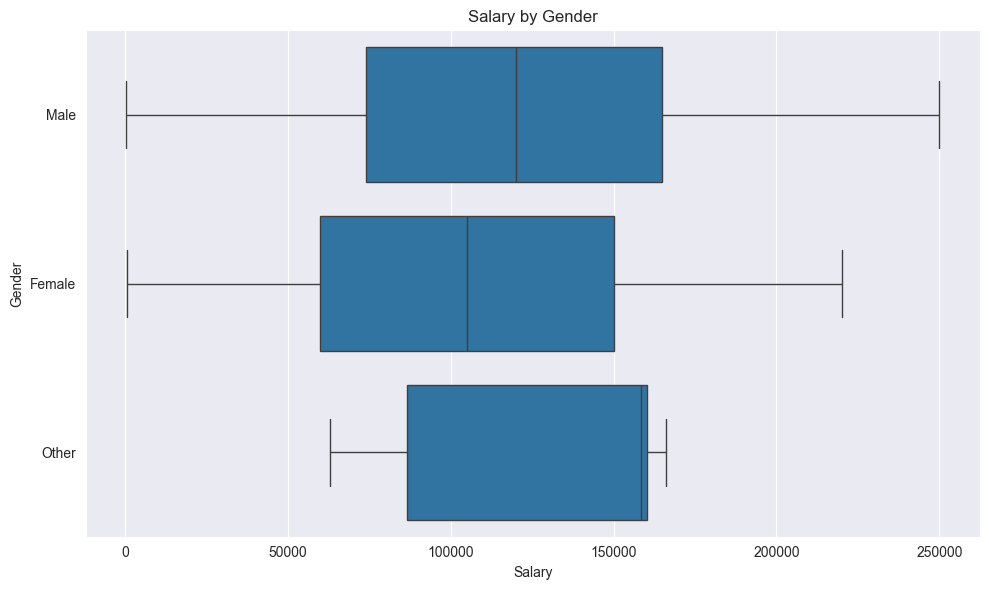

In [27]:
# 10. Salary by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Salary', y='Gender', data=df)
plt.title('Salary by Gender')
plt.xlabel('Salary')
plt.ylabel('Gender')
plt.tight_layout()
plt.savefig(os.path.join(plot_dir,'salary_by_gender.png'))
plt.show()

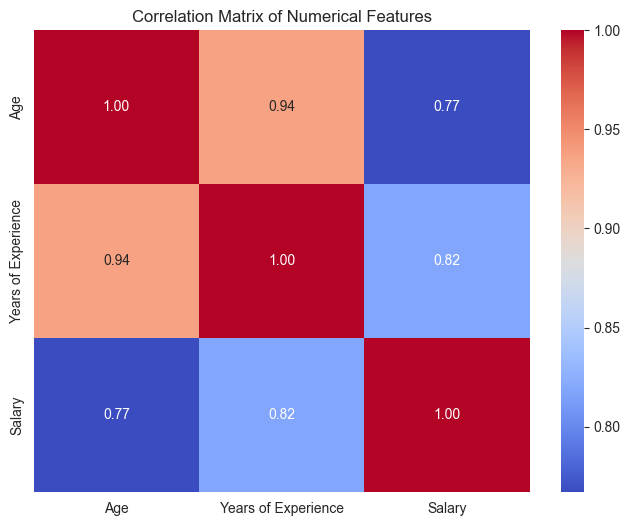

In [28]:
# 11. Correlation Heatmap
plt.figure(figsize=(8, 6))
numerical_df = df[['Age', 'Years of Experience', 'Salary']]
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.savefig(os.path.join(plot_dir,'correlation_heatmap.png'))
plt.show()

In [29]:
X = df[['Years of Experience']]
y = df['Salary']

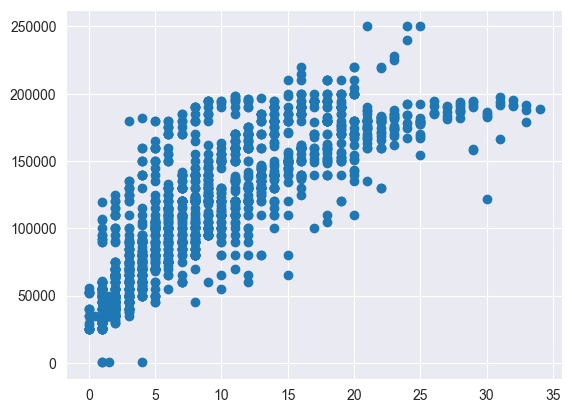

In [30]:
plt.scatter(X, y)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
print("shape of x_train: ", X_train.shape)

shape of x_train:  (1429, 1)


In [33]:
# 1. Initialize parameters
beta_0 = 0  # Intercept
beta_1 = 0  # Slope

# 2. Set hyperparameters
learning_rate = 0.005  # How big of a step to take
epochs = 1000         # How many times to iterate

n = float(len(X_train))
# 3. Perform Gradient Descent
for i in range(epochs):
    # Predict y_hat
    y_pred = beta_1 * X_train["Years of Experience"] + beta_0
    # Calculate the gradients (derivatives of the cost function)
    D_beta_1 = (-2/n) * sum(X_train['Years of Experience'] * (y_train - y_pred))
    D_beta_0 = (-2/n) * sum(y_train - y_pred)

    # Update the parameters
    beta_1 = beta_1 - learning_rate * D_beta_1
    beta_0 = beta_0 - learning_rate * D_beta_0

print(f"Learned from scratch: Intercept (beta_0) = {beta_0:.2f}, Slope (beta_1) = {beta_1:.2f}")

Learned from scratch: Intercept (beta_0) = 54345.98, Slope (beta_1) = 6351.61


In [34]:
from sklearn.linear_model import LinearRegression

# 1. Create a model instance
model = LinearRegression()

# 2. Fit the model to the training data
model.fit(X_train, y_train)

print(f"Learned with scikit-learn: Intercept = {model.intercept_:.2f}, Slope = {model.coef_[0]:.2f}")

Learned with scikit-learn: Intercept = 55961.67, Slope = 6237.73


In [35]:
y_pred_A = beta_1 * X + beta_0

# For Path B (scikit-learn)
y_pred_B = model.predict(X)


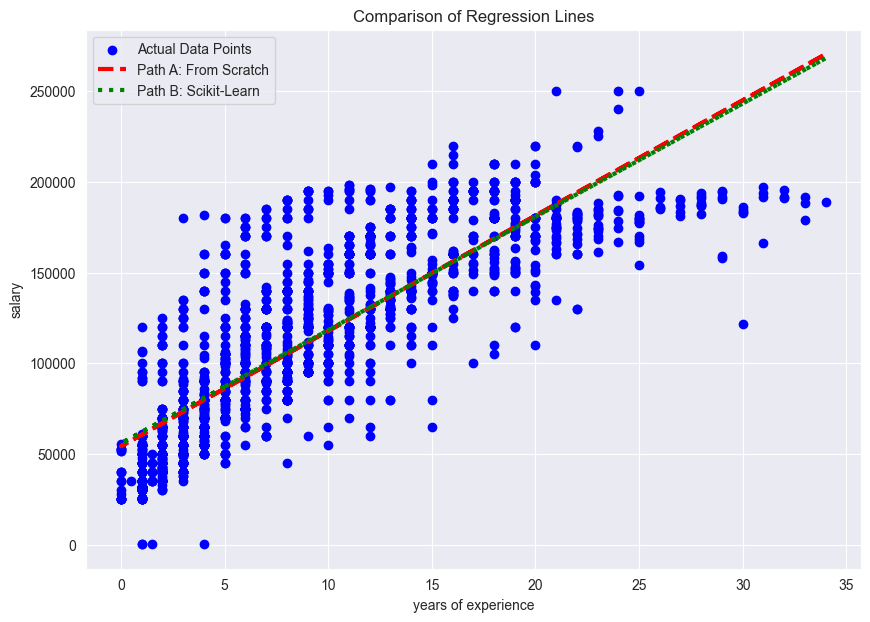

In [36]:
plt.figure(figsize=(10, 7))
# Plot the original data points
plt.scatter(X, y, color='blue', label='Actual Data Points')

# Plot the "From Scratch" regression line
plt.plot(X, y_pred_A, color='red', linestyle='--', linewidth=3, label='Path A: From Scratch')

# Plot the "Scikit-Learn" regression line
plt.plot(X, y_pred_B, color='green', linestyle=':', linewidth=3, label='Path B: Scikit-Learn')

plt.title('Comparison of Regression Lines')
plt.xlabel('years of experience')
plt.ylabel('salary')
plt.legend()
plt.grid(True)
plt.show()